In [20]:
# mathimical operations
import numpy as np
# loding and cleaning csv data
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error,r2_score

# saving my advertising data and save it into data(variable) which is basically pandas dataframe
data = pd.read_csv("Advertising.csv")
# head prints the top 5 rows of my data
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [42]:
# now we analyze data before training
# it will show how  many rows and colums we have in our data
data.shape
# shows data type of our data
data.info
#or
data.describe
# we get insight of our data i.e. we get mean, median(50% of our data), max.

data.columns #colums and data type


Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [22]:
data.shape

(200, 5)

In [23]:
data.info


<bound method DataFrame.info of      Unnamed: 0     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

In [24]:
data.describe

<bound method NDFrame.describe of      Unnamed: 0     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

In [25]:
data.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [26]:
# before trainining a model we visualize our data to see trend and find pattern for that we use
# draw graph
import matplotlib.pyplot as plt
# draw graph advance
import seaborn as sns


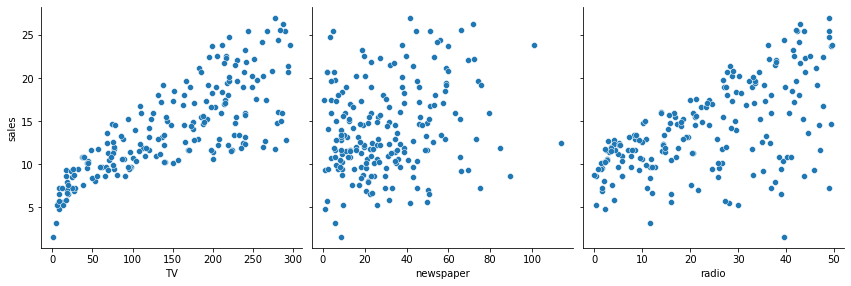

In [27]:
sns.pairplot(data, x_vars=['TV','newspaper','radio'], y_vars='sales',size=4, aspect=1, kind='scatter')
# 3 graph we get tv news radio using dataset(data) where x value is tv news radio and yaxis is our sales so it is
# tv vs sales graph respectively

# the graph we get will show how datapoints affecting sales in tv are very close to each other than the other two hence
# we can conclude sales in tv is better than other two


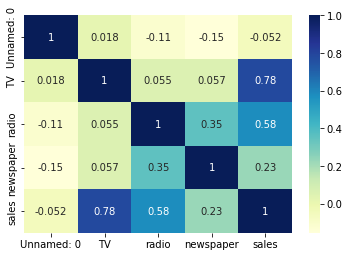

In [43]:
# another chart to show corelation between variables is heatmap
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True )

plt.show() #not nessesory if using jupyter
# in graph darker shade means high corelation while lighter shade means low
# 1st row TV have very high corr 0.9 btwn tv and sales

# from this we conclude that sales is more dependent on tv variable
# so for further process we consider tv as our predected variable and sales as our target variable

In [32]:
# now we create X and y in X we put predictive variable and in y we put target variable
X = data['TV']
y = data['sales']

In [33]:
# split our data in train and test ie half of model is used for training and other half will be used for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)
# train_test_split fn take Xandy pred var and target var respectively 0.7 means on 70% of data we train our model and
# rest 30%data we use for testing our model
# and take random rows for fair result, also we return values to xtrain,xtest, ytrain ytest

In [35]:
X_train.head()
# to check train dataset

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [36]:
y_train.head()
# to check train dataset

74     17.0
3      18.5
185    22.6
26     15.0
90     11.2
Name: sales, dtype: float64

In [37]:
# now to perform linear regression we import LR lib by using either one of these:
from sklearn.linear_model import LinearRegression
# or
import statsmodels.api as sm


In [38]:
# limitation with stack model is by default it doesn't add "c"(y intercept) so manually we add constant fn
# using "add_constant"
X_train_sm = sm.add_constant(X_train)  # adding constant to get intercept

In [39]:
# OLS is ordinanary least square to fit the regression line, we pass our training data to this fn which trains the
# model using equation for LR and stored in variable named lr
lr = sm.OLS(y_train, X_train_sm).fit()

In [40]:
# print parameters i.e. the intercept and slope of regression line fitted
lr.params

const    6.989666
TV       0.046497
dtype: float64

In [44]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     219.0
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           2.84e-30
Time:                        09:18:55   Log-Likelihood:                -370.62
No. Observations:                 140   AIC:                             745.2
Df Residuals:                     138   BIC:                             751.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9897      0.548     12.762      0.0

In [45]:
# we are pridicting the value which is stored in Xtrain dataset and storing it in ytrain
y_train_pred = lr.predict(X_train_sm)
print(y_train_pred)
#left side all are input and right side all are predictions

74     16.912202
3      14.034016
185    16.521624
26     13.634138
90     13.234261
         ...    
87     12.136923
103    15.726520
67     13.466748
24      9.886451
8       7.389543
Length: 140, dtype: float64


In [46]:
# now for recidual formula is diff btwn actual value and pred value
res = (y_train - y_train_pred)

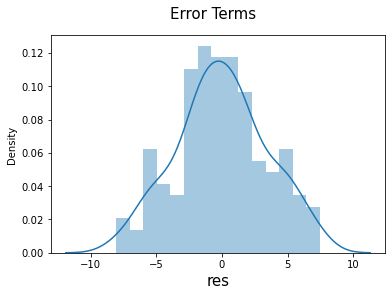

In [49]:
# now to see its visual we draw a graph using lib matplotlib
fig = plt.figure() # we initilise figure and class(plt)
sns.distplot(res, bins = 15) #we use sns lib to use distplot(distribution plot coz recidual should be normally distributed)
# so we pass residual and bins (horizontal blocks like structure shown in graph and 15 is number of blocks)
fig.suptitle('Error Terms', fontsize = 15) #to give title of graph
plt.xlabel('res', fontsize = 15)  #res
plt.show()
# we can observe that centre of this curve is nearby zero which is good
# and we can say res is normally distributed


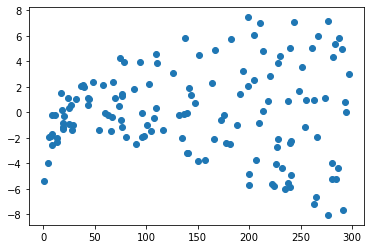

In [50]:
# now we can observe pattern in our residual for that
plt.scatter(X_train,res)
plt.show()

In [51]:
# now imagin a horizontal line from 0 of yaxis parallel to x axis 
# we observe all datapoints are close to that line so our data points seems to equally distributed


# now we will do prediction on test model

# again
# limitation with stack model is by default it doesn't add "c"(y intercept) so manually we add constant fn
# using "add_constant"

X_test_sm = sm.add_constant(X_test) # Add a constant to X_test
y_pred = lr.predict(X_test_sm) #passing to our model to pred value
y_pred.head()



126     7.352345
104    18.065337
99     13.276109
92     17.112141
111    18.228077
dtype: float64

In [52]:
from sklearn.metrics import mean_squared_error,r2_score
# this will import both mean sq error and r2 score
# we need this for doing evaluation of our model



In [53]:
r_squared = r2_score(y_test, y_pred) #ytest and ypred values we passing in rsquare
r_squared
# 59% of data model is predicting
# in trainig i was getting R-squared: 0.613
# as r2 is close to 1 that means all data points are closer to line and line fits perfectly

0.59429872677833

In [56]:
# now for mean square
print(data["sales"].var())
np.sqrt(mean_squared_error(y_test, y_pred))
# metric to measure avg square btwn pred and actual value
# metric to evaluate efficiency of the model
# mean sq error should be lower than variance of target var() sq


27.221853015075364


2.8241456288327016

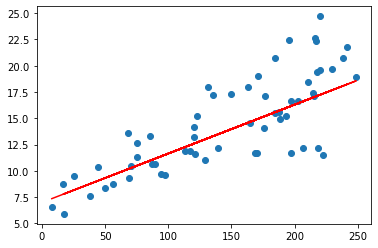

In [57]:
# now visualize the fit on text set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, 'r')
plt.show()
# normally distributed so model is performing well